# Final Project

* This project's aim is to compare annual snowfall at Mount Baker to the Nooksack River discharge. Here are my assumptions:
    * The annual snowfall at Mount Baker ski resort is a good proxy for the annual snowfall in the North Cascades.
    * Snowmelt is the primary contributor to the Nooksack River's flow rate.

#### Hypothesis

* Yearly snowfall in the North Cascades is directly related to the nooksack river's flow.

#### Using Pandas to read the Mount Baker Snowfall CSV file.

---

In [15]:
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


col_list=['Years', 'Total_Snowfall']
data = pd.read_csv("FinalProjectData.csv", usecols = col_list)

#Changing the column name from Total_Snowfall to Total Snowfall.

data = data.rename(columns={'Total_Snowfall': 'Total Snowfall'})

#### Setting x and y equal to 'Years'/ 'Total Snowfall' and plotting the data.

---

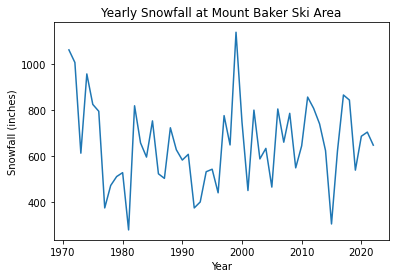

In [16]:
y = data['Total Snowfall']
x = data['Years']

plt.plot(x, y)
plt.ylabel('Snowfall (inches)')
plt.xlabel('Year')
plt.title('Yearly Snowfall at Mount Baker Ski Area')
plt.show()

#### Constructing a loop to calculate error values.

---

In [17]:
mean_snowfall = np.mean(y)
error_values = []
for value in y:
    difference = round(mean_snowfall - value)
    error_values.append(difference)
print(error_values)

[-409, -354, 42, -304, -171, -141, 281, 183, 144, 127, 377, -165, -3, 59, -99, 132, 152, -69, 27, 72, 47, 281, 255, 123, 112, 215, -122, 6, -486, -94, 205, -146, 67, 21, 190, -151, -6, -132, 106, 10, -203, -154, -86, 31, 351, 32, -212, -190, 116, -32, -50, 7]


#### Plotting error values relative to the STD (Positive and Negative).

---

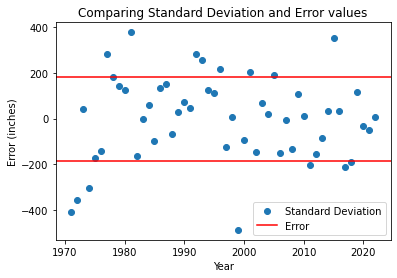

In [18]:
pos_std_snowfall = np.std(y)
neg_std_snowfall = -np.std(y)

plt.scatter(x, error_values)
plt.axhline(pos_std_snowfall, color='r', linestyle='-')
plt.gca().legend(('Standard Deviation','Error'))
plt.axhline(neg_std_snowfall, color='r', linestyle='-')
plt.ylabel('Error (inches)')
plt.xlabel('Year')
plt.title('Comparing Standard Deviation and Error values')
plt.show()

#### Appending above and below average snowfalls into separate lists.

---

In [19]:
above_average = []
for n in error_values:
    if pos_std_snowfall < n:
        above_average.append(n)
print("Above Average Snowfall: %s" %(above_average))

below_average = []
for n in error_values:
    if neg_std_snowfall > n:
        below_average.append(n)
print("Below Average Snowfall: %s" %(below_average))

Above Average Snowfall: [281, 377, 281, 255, 215, 205, 190, 351]
Below Average Snowfall: [-409, -354, -304, -486, -203, -212, -190]


#### Fitting a trend line to the data.

---

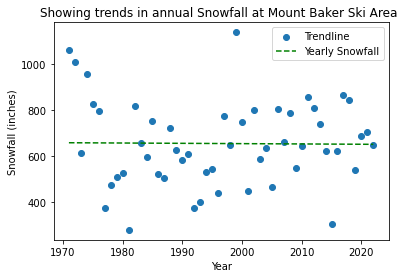

Slope: -0.14  The slope represents the yearly decline in annual snowfall, albeit small. 


In [20]:

m, b = np.polyfit(x, y, 1)

plt.scatter(x, y)
plt.plot(x, m*x + b, color = 'g', linestyle='--')
plt.gca().legend(('Trendline','Yearly Snowfall'))
plt.ylabel('Snowfall (inches)')
plt.xlabel('Year')
plt.title('Showing trends in annual Snowfall at Mount Baker Ski Area ')
plt.show()

print("Slope: %3.2f" %(m),' The slope represents the yearly decline in annual snowfall, albeit small. ')

#### Calculating the R-squared value of the trendline.

---

In [21]:
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print("Mount Baker annual snowfall R-Squared value: %5.4f" %(R_sq))
print('Only 0.01% of the variation can be accounted for by the trendline.')

Mount Baker annual snowfall R-Squared value: 0.0001
Only 0.01% of the variation can be accounted for by the trendline.


#### Reading Nooksack river discharge data.
 
 ---

In [22]:
nooksack_discharge = pd.read_csv("NooksackRiver_Discharge.csv")
discharge = nooksack_discharge['Discharge']
x1 = nooksack_discharge['Water Year']


#### Running the discharge data through a loop to convert it to the type float before plotting it.
---

In [23]:
y1 = [0]*len(discharge)
i = 0
for i in range(len(discharge)):
    y1[i] = float(discharge[i].replace(',', ''))
    i =+ 1
print(y1)
print(type(y1[0]))

[4201.0, 4765.0, 3983.0, 3107.0, 4437.0, 5015.0, 3026.0, 5022.0, 3502.0, 5094.0, 2770.0, 3586.0, 2695.0, 3517.0, 4062.0, 4310.0, 3747.0, 4148.0, 3272.0, 3744.0, 3295.0, 2970.0, 3734.0, 4295.0, 5152.0, 3055.0, 3101.0, 2850.0, 3346.0, 4391.0, 3496.0, 4748.0, 4252.0, 2536.0, 4508.0, 3070.0, 4242.0, 3877.0, 3962.0, 4408.0, 3961.0, 3400.0, 4241.0, 4448.0, 4027.0, 4349.0, 3850.0, 3915.0, 3771.0, 4045.0, 3809.0, 3155.0, 3944.0, 3605.0]
<class 'float'>


#### Why the previous step is necessary:

---

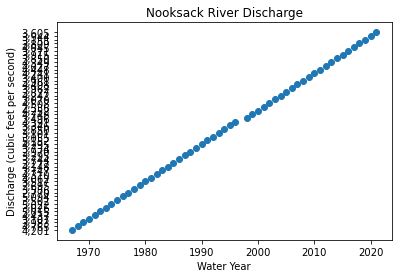

In [24]:
plt.scatter(x1, discharge)
plt.title('Nooksack River Discharge')
plt.xlabel('Water Year')
plt.ylabel('Discharge (cubic feet per second)')
plt.show()

#### Plotting discharge and water year.

---

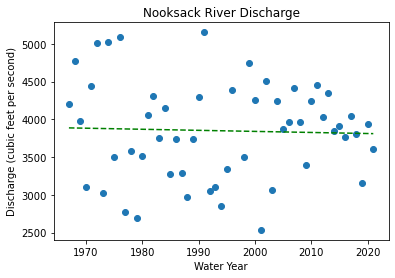

Slope: -1.41  The slope represents the yearly decline in Nooksack River Flowrate 


In [25]:
m1, b1 = np.polyfit(x1, y1, 1)

plt.scatter(x1, y1)
plt.plot(x1, m1*x1 + b1, color = 'g', linestyle='--')
plt.title('Nooksack River Discharge')
plt.xlabel('Water Year')
plt.ylabel('Discharge (cubic feet per second)')
plt.show()

print("Slope: %3.2f" %(m1),' The slope represents the yearly decline in Nooksack River Flowrate ')

#### Calculating R-squared for the Nooksack river trendline.

---

In [26]:
corr_matrix = np.corrcoef(x, y)
corr = corr_matrix[0,1]
R_sq = corr**2
 
print("Nooksack discharge R-Squared Value: %6.5f" %(R_sq))
print('Only 0.12% of the variation can be accounted for by the trendline.')

Nooksack discharge R-Squared Value: 0.00012
Only 0.12% of the variation can be accounted for by the trendline.


#### Making a bargraph showing the percent differences in annual snowfall and discharge.

---

Text(0.5, 1.0, 'Comparing Annual Snowfall and Discharge Decreases')

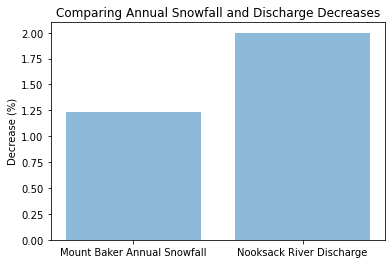

In [13]:
objects = ('Mount Baker Annual Snowfall', 'Nooksack River Discharge')
x = ('Mount Baker Annual Snowfall'), ('Nooksack River Discharge')
y = [1.23, 2.00]
y_pos = np.arange(len(objects))
percent_decrease = y


plt.bar(y_pos, percent_decrease, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel('Decrease (%)')
plt.title('Comparing Annual Snowfall and Discharge Decreases')

# Conclusion

* Mount Baker annual snowfall decrease (1.23%) does not fully explain the Nooksack River discharge decrease (2.00%). 
* I recommend that future researchers focus on looking at recent agricultural developments and urbanization as possible sources for the decrease in the Nooksack's flow rate.

